In [292]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')



In [293]:
#loading the dataset into the pandas dataframe.
data=pd.read_csv('data.csv')

In [294]:
#printing the first five rows of the dataset
data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [295]:
#printing the last five rows of the dataset
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [296]:
#printing randomly five sample rows of the dataset
data.sample(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3102,IN,100,415,406-7643,no,yes,32,125.2,123,21.28,...,101,19.63,192.0,106,8.64,12.6,9,3.40,3,False
1307,SD,139,510,331-9149,no,no,0,196.0,135,33.32,...,146,15.81,153.0,92,6.89,9.8,1,2.65,3,False
471,NV,78,408,345-3451,no,no,0,75.0,116,12.75,...,87,21.14,176.0,83,7.92,9.5,6,2.57,3,False
1178,WI,111,415,350-9313,no,yes,36,166.2,54,28.25,...,109,20.30,108.8,92,4.90,11.2,2,3.02,3,False
1796,TX,79,415,330-8142,no,no,0,144.0,90,24.48,...,91,11.54,212.4,129,9.56,13.0,4,3.51,1,False


In [297]:
#printing the columns of the dataset
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [298]:
#printing the information about then dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [299]:
#checking the data types in our dataset
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [300]:
#get the summary statistics of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [301]:
#checking the missing value in our dataset
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [302]:
#checking the duplicates in our dataset
data.duplicated().sum()

0

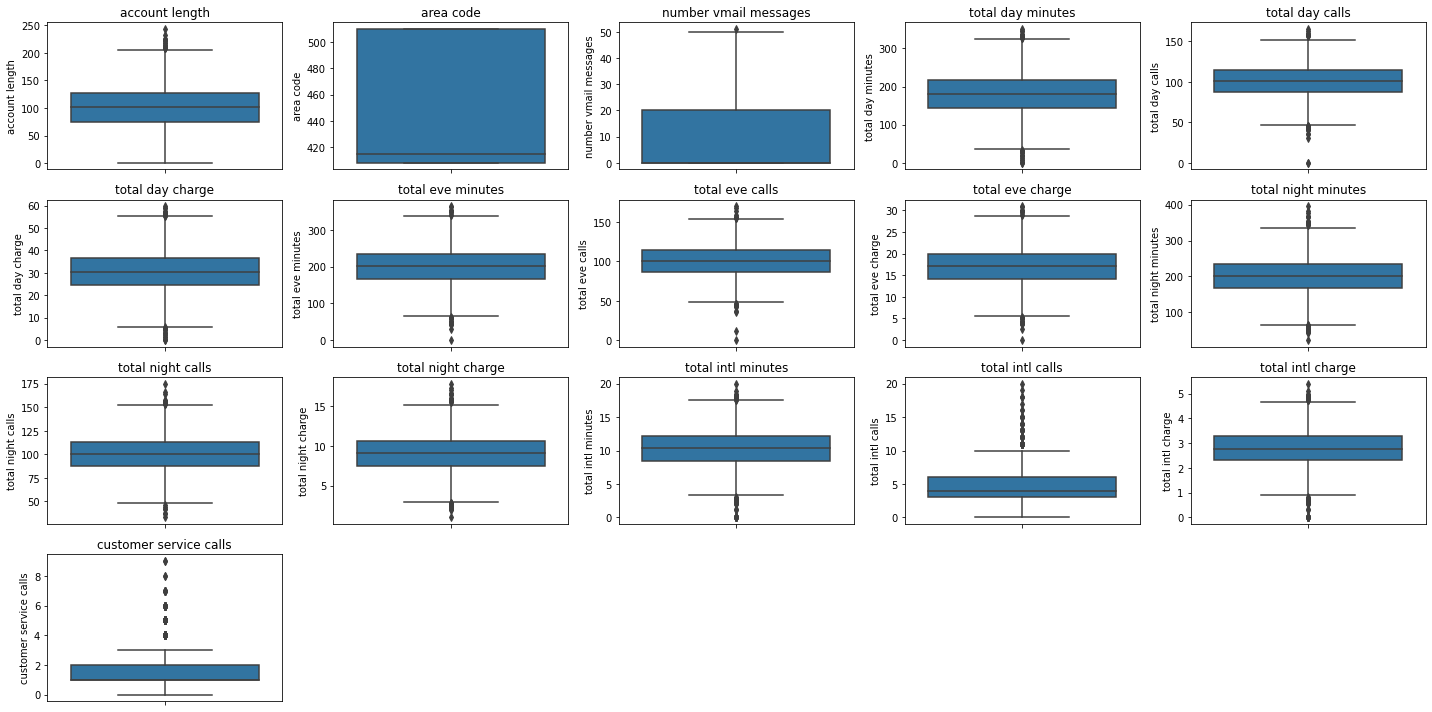

In [303]:
# Create a DataFrame with only numerical columns
numerical_colm = data.select_dtypes(exclude='object').columns

# Exclude 'churn' if it exists
if 'churn' in numerical_colm:
    numerical_colm = numerical_colm.drop('churn')

# Plot boxplots for numerical columns
plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_colm):
    plt.subplot(4, 5, i + 1)  # Adjust grid size based on column count
    sns.boxplot(data=data, y=col)  
    plt.title(col)

plt.tight_layout()
plt.show()

In [304]:
#removing outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within the bounds
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply removal for each numerical column
for col in numerical_colm:
    data = remove_outliers(data, col)

print("Outliers have been removed.")

Outliers have been removed.


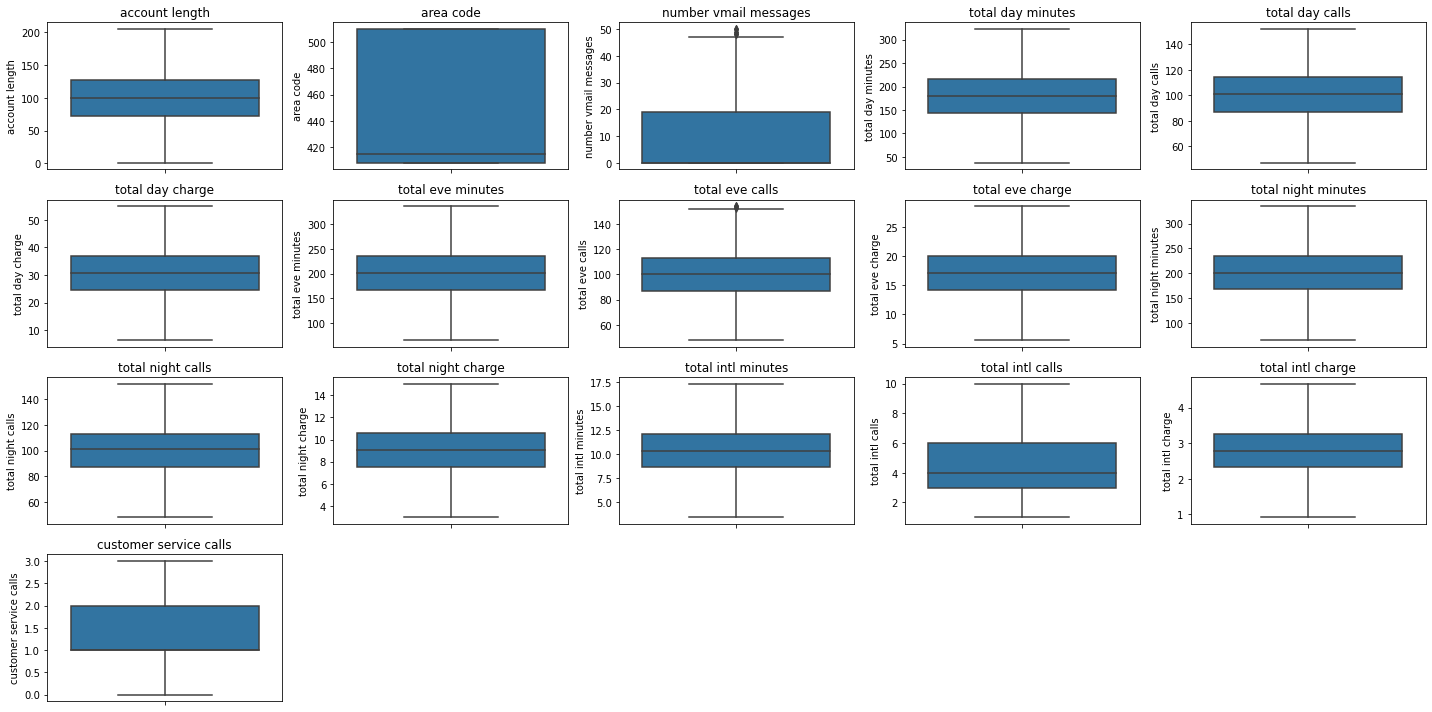

In [305]:
# Boxplot to confirm outlier handling
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_colm):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(data=data, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

False    2493
True      304
Name: churn, dtype: int64


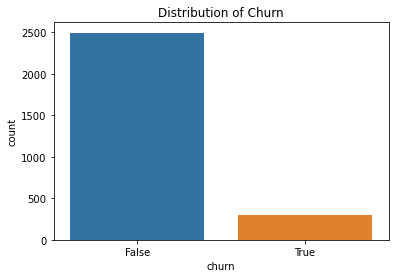

In [306]:
# Check target variable distribution
print(data['churn'].value_counts())

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='churn')
plt.title("Distribution of Churn")
plt.show()

# Data preparation

In [307]:
# Drop 'phone number' column as it is not relevant to our analysis and modelling
data = data.drop(columns=["phone number"], axis=1)
data.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [308]:
# Replace spaces with underscores in column names
data.rename(columns=lambda x: x.replace(' ', '_'),inplace=True)
data.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [309]:
# Calculate correlation with the target variable
correlations = data.corr()['churn'].sort_values(ascending=False)
print(correlations)

churn                     1.000000
total_day_minutes         0.296650
total_day_charge          0.296645
total_eve_minutes         0.139158
total_eve_charge          0.139144
total_intl_charge         0.076327
total_intl_minutes        0.076292
total_night_minutes       0.057638
total_night_charge        0.057623
total_day_calls           0.023329
total_night_calls         0.018733
account_length            0.012934
total_eve_calls          -0.003776
area_code                -0.004978
customer_service_calls   -0.016661
total_intl_calls         -0.058596
number_vmail_messages    -0.086322
Name: churn, dtype: float64


# Exploratory data analysis

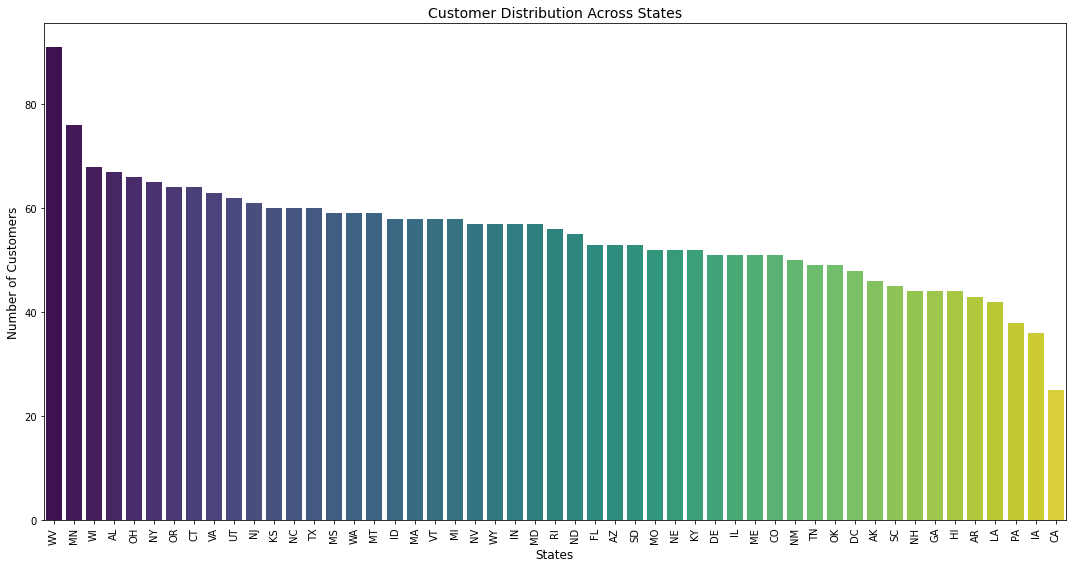

In [310]:

# Plot customer distribution across states
plt.figure(figsize=(15, 8)) 
sns.countplot(data=data, x='state', order=data['state'].value_counts().index, palette='viridis')

# Set the title and labels
plt.title('Customer Distribution Across States', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

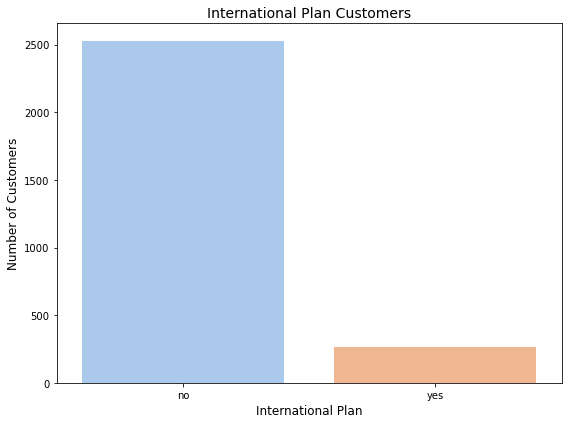

In [311]:
# Plot the distribution of customers with/without an international plan
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='international_plan', palette='pastel')

# Set the title and axis labels
plt.title('International Plan Customers', fontsize=14)
plt.xlabel('International Plan', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

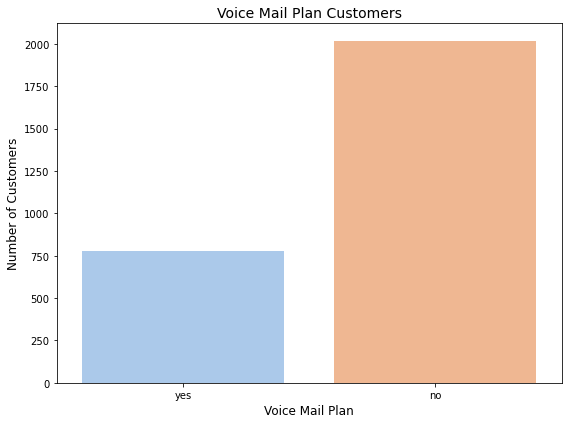

In [312]:
# Plot the distribution of customers with/without a voice mail plan
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='voice_mail_plan', palette='pastel')

# Set the title and axis labels
plt.title('Voice Mail Plan Customers', fontsize=14)
plt.xlabel('Voice Mail Plan', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

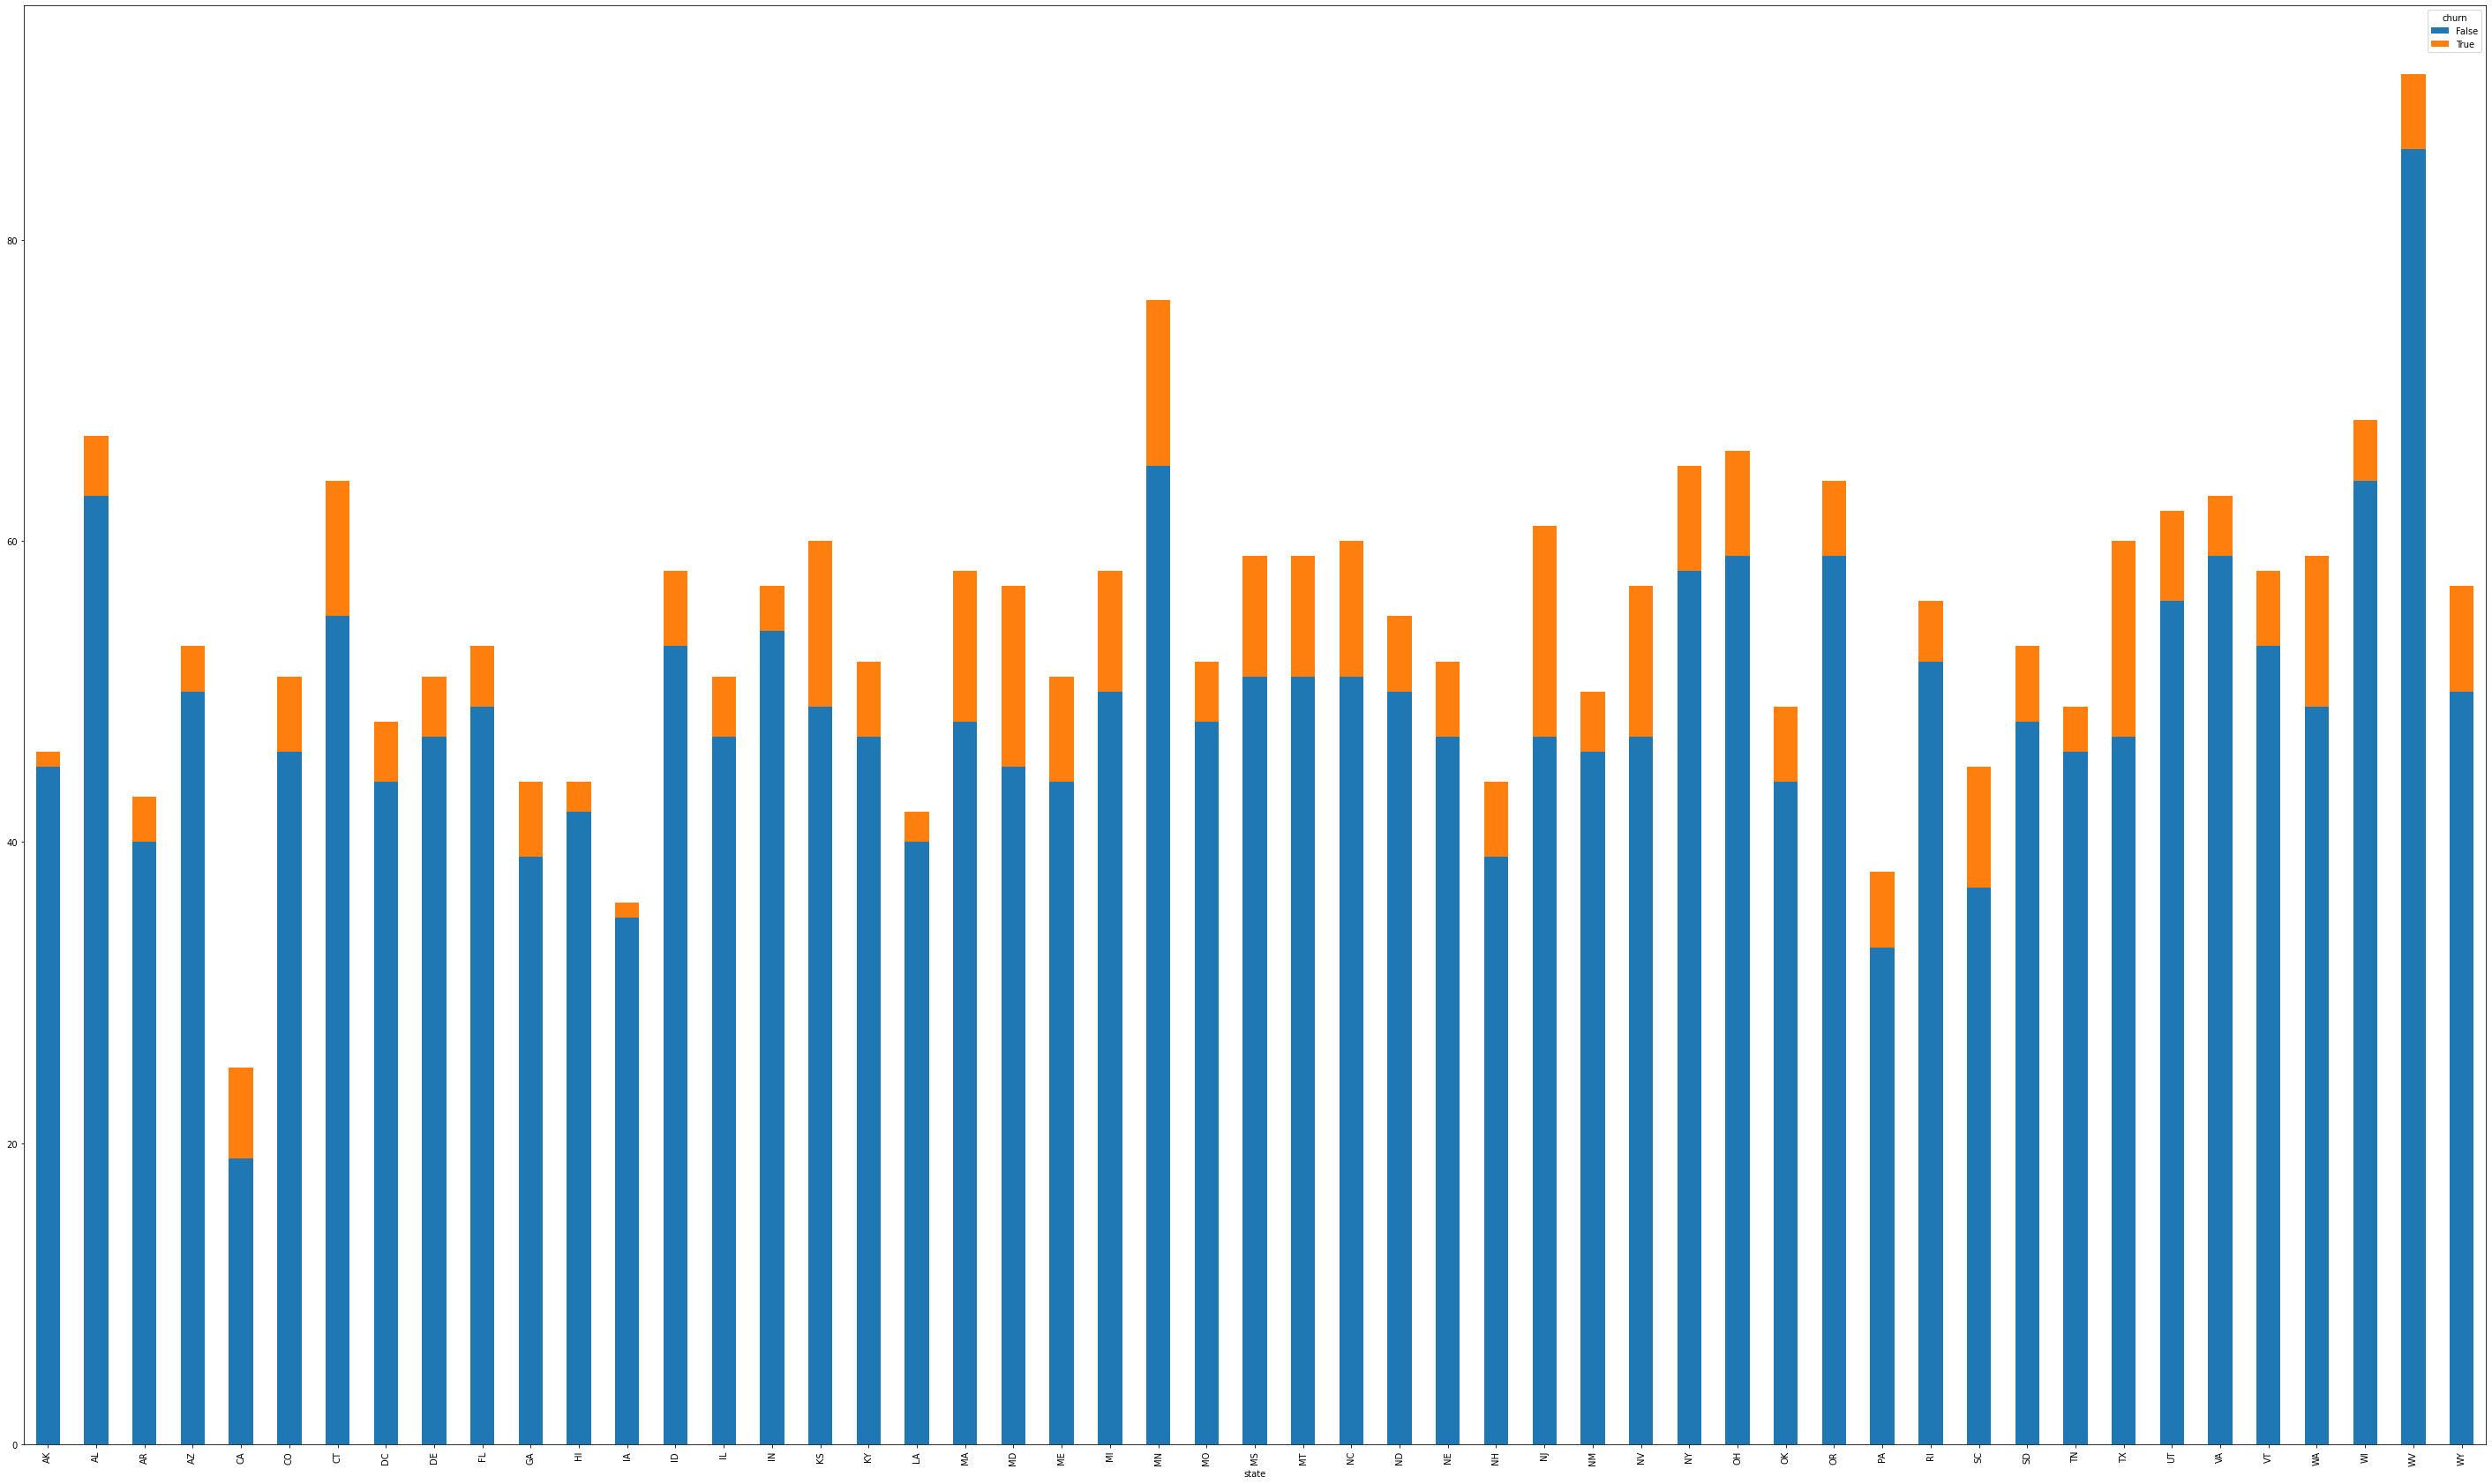

In [313]:
# Group the DataFrame 'df' by two columns: "state" and "churn"
grouped = data.groupby(["state", "churn"])

# Calculate the size (count) of each group and unstack the result
# Unstacking will pivot the data to make it suitable for a stacked bar plot
unstacked = grouped.size().unstack()

# Create a stacked bar plot using the unstacked data
unstacked.plot(kind='bar', stacked=True, figsize=(50, 30));

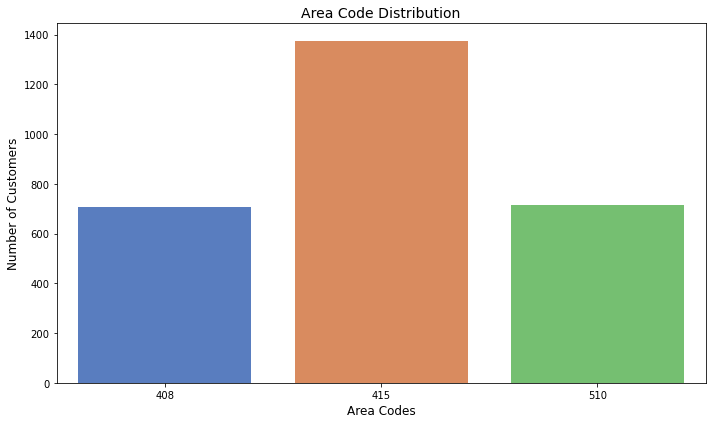

In [314]:
# Plot the distribution of customers by area code
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='area_code', palette='muted')

# Set the title and axis labels
plt.title('Area Code Distribution', fontsize=14)
plt.xlabel('Area Codes', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

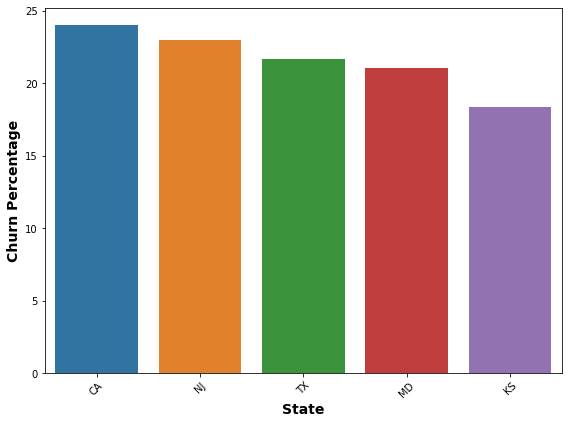

state
CA    24.000000
NJ    22.950820
TX    21.666667
MD    21.052632
KS    18.333333
Name: churn, dtype: float64

In [315]:
# Calculate churn percentage by state
state_churn_percentage = data.groupby('state')['churn'].mean() * 100

# Sort the states by churn percentage in descending order and select the top 5 states
top_states = state_churn_percentage.sort_values(ascending=False).head(5)
top_states

# Plotting the top 5 states
plt.figure(figsize=(8, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.ylabel('Churn Percentage', fontsize=14, fontweight='bold')
#plt.title('Top 5 States with Highest Churn Percentage', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Calculate churn percentage by state
state_churn_percentage = data.groupby('state')['churn'].mean() * 100

# Sort the states by churn percentage in descending order and select the top 5 states
top_states = state_churn_percentage.sort_values(ascending=False).head(5)
top_states

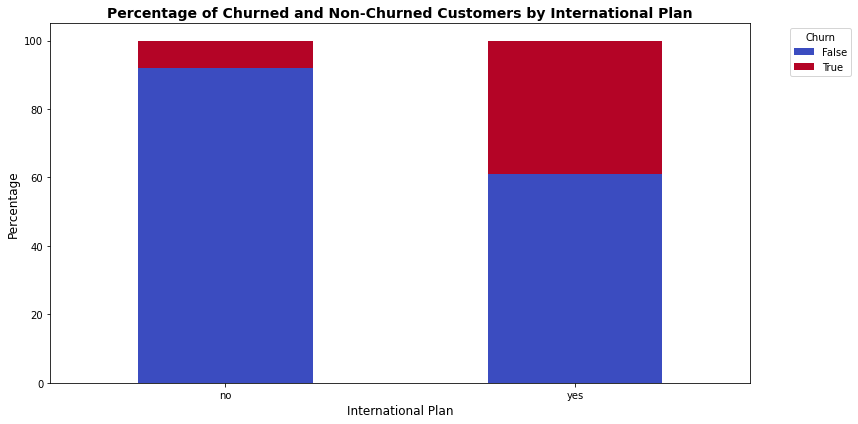

In [316]:
# Calculate the percentage of churned and non-churned customers by international plan
churn_counts = data.groupby(['international_plan', 'churn']).size().unstack()

# Calculate the percentage for each group
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plotting the data
plt.figure(figsize=(12, 6))
churn_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())

# Customize the plot
plt.title('Percentage of Churned and Non-Churned Customers by International Plan', fontsize=14, fontweight='bold')
plt.xlabel('International Plan', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



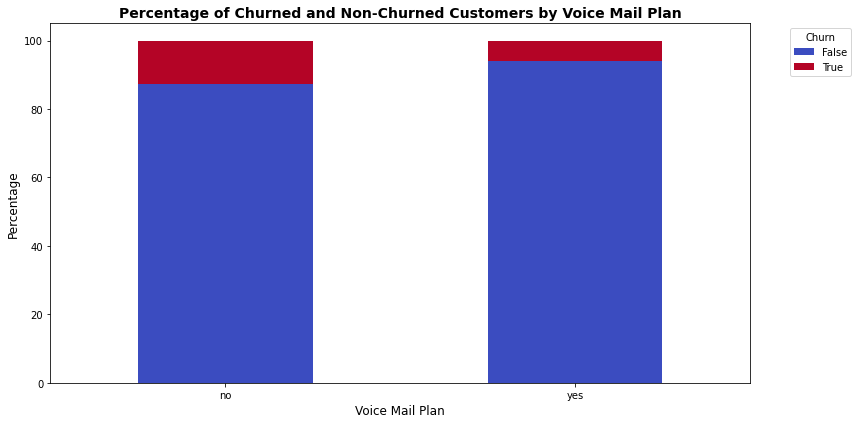

In [317]:

# Create a new DataFrame that calculates the percentage of churned and non-churned customers by voice mail plan
churn_counts = data.groupby(['voice_mail_plan', 'churn']).size().unstack().fillna(0)

# Calculate percentages for each group
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plotting the data as a bar plot
plt.figure(figsize=(12, 6))
churn_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())

# Customizing the plot
plt.title('Percentage of Churned and Non-Churned Customers by Voice Mail Plan', fontsize=14, fontweight='bold')
plt.xlabel('Voice Mail Plan', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout for better visibility
plt.show()


In [318]:
# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()
#Encoding the "churn" column
data['churn'] = label_encoder.fit_transform(data['churn'])

In [319]:
# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['churn', 'state'], axis=1)
y = data['churn']
y.value_counts()

0    2493
1     304
Name: churn, dtype: int64

In [320]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [321]:
# Identify numerical columns in the DataFrame by selecting columns with non-object data types
numerical_columns=X.select_dtypes(exclude='object').columns
# Identify categorical columns in the DataFrame by selecting columns with non-object data types
cat_columns=X.select_dtypes(include='object').columns

In [322]:
# Define the numerical pipeline: handles scaling and missing values for numerical features
num_pipeline=Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('imputer',SimpleImputer(strategy='median'))
    ]
)
# Define the categorical pipeline: handles missing values and encoding for categorical features
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore',sparse=False))
        
    ]
)

preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_columns),
        ('categorical_columns',cat_pipeline,cat_columns)
    ]
)

In [323]:
# Transform the training data using the preprocessor pipeline
X_train=preprocessor.fit_transform(X_train)
X_train

array([[-0.66182949, -0.51050434,  1.76694778, ...,  0.        ,
         0.        ,  1.        ],
       [-1.34232794,  1.75569644, -0.58766687, ...,  1.        ,
         1.        ,  0.        ],
       [-0.68703314,  1.75569644,  1.47262095, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.08214563,  1.75569644, -0.58766687, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.92600021,  1.75569644, -0.58766687, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86345866, -0.67748756, -0.58766687, ...,  0.        ,
         1.        ,  0.        ]])

In [324]:
# Transform the test data using the preprocessor pipeline
X_test=preprocessor.transform(X_test)
X_test

array([[-1.74558628, -0.67748756,  1.47262095, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.20324032, -0.51050434,  2.06127461, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.19509447, -0.67748756, -0.58766687, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 1.15283302, -0.67748756,  1.69336607, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.06907624, -0.51050434,  2.13485632, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.34631635,  1.75569644,  1.61978437, ...,  0.        ,
         0.        ,  1.        ]])

In [325]:
# Instantiate a logistic regression model with a specified solver
model=LogisticRegression(solver='liblinear')
# Fit the logistic regression model on the training data
model.fit(X_train,y_train)
# Predict the target variable for the test set
y_pred=model.predict(X_test)
# Calculate the accuracy score by comparing the true labels to the predicted labels
acc=accuracy_score(y_test,y_pred)
acc=round(acc,4)
acc

0.9071

In [326]:
# Get the predicted probabilities for the positive class (class 1) from the test set
y_pred=model.predict_proba(X_test)[:,1]
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
auc=roc_auc_score(y_test,y_pred)
auc


0.8782154472880187

In [327]:
# Predict the probability estimates for the test set using the logistic regression mode
y_pred_train=model.predict(X_train)
# Calculate the ROC AUC score for the predicted probabilities against the true labels
acc_train=accuracy_score(y_train,y_pred_train)
acc_train

0.9105945462673223

# checking for overfitiing

In [328]:
# Print the testing accuracy score with 4 decimal places for clarity
print(f'testing accuracy score:{acc:.4f}')
# Print the training accuracy score with 4 decimal places to compare with the testing accuracy
print(f'training accuracy score:{acc_train:.4f}')

testing accuracy score:0.9071
training accuracy score:0.9106


The training-set accuracy score is :0.9071 while the test-set accuracy to be 0.9106. These two values are quite comparable. So, there is no question of overfitting

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 90.71% accuracy on the test and the 90.58% on  training set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

I will decrease the C and fit a more flexible model.

In [329]:
# Create a logistic regression model with specified hyperparameters
model=LogisticRegression(C=0.01,solver='liblinear')
# Fit the logistic regression model using the training data
model.fit(X_train,y_train)
# Make predictions on the test set using the fitted model
y_pred=model.predict(X_test)
# Calculate the accuracy score of the model on the test set
acc=accuracy_score(y_test,y_pred)
acc=round(acc,4)
acc

0.9036

## Compare model accuracy with null accuracy
So, the model accuracy is 0.9036. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [330]:
# Display the count of each unique value in the 'churn' column of the 'data' DataFrame
data.churn.value_counts()

0    2493
1     304
Name: churn, dtype: int64

In [331]:
# Calculate the null accuracy for a classification model.
null_accuracy=2493/(2493+304)
round(null_accuracy,4)

0.8913

Our model demonstrates an accuracy score of 0.9036, which surpasses the null accuracy score of 0.8913. This indicates that the Logistic Regression model performs well in predicting class labels, showing reliable accuracy.

However, accuracy alone does not reveal the distribution of predictions or the specific errors the classifier makes. To address this, we can use a Confusion Matrix, which provides deeper insights into the types of errors and the performance across different classes

In [332]:
# Generate a confusion matrix to evaluate the performance of the classification model.
cm = confusion_matrix(y_test, y_pred)
cm

array([[494,   5],
       [ 49,  12]], dtype=int64)

Confusion matrix

 [[496,   3],
 [ 18,   43]]

True Positives(TP) =  496

True Negatives(TN) =  43

False Positives(FP) =  3

False Negatives(FN) =  18
The confusion matrix shows 20892 + 3285 = 24177 correct predictions and 3087 + 1175 = 4262 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 496

True Negatives (Actual Negative:0 and Predict Negative:0) - 43

False Positives (Actual Negative:0 but Predict Positive:1) - 3 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 82(Type II error)

<AxesSubplot:>

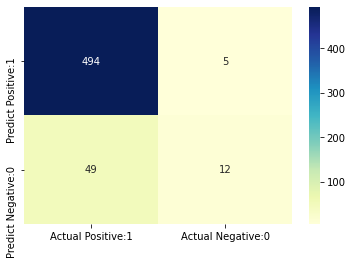

In [333]:
# Convert the confusion matrix into a DataFrame for better visualization and interpretation.
cm= pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
# Use seaborn to create a heatmap for visual representation of the confusion matrix.
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

## Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [334]:
# Print the classification report for the test data and predicted results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       499
           1       0.71      0.20      0.31        61

    accuracy                           0.90       560
   macro avg       0.81      0.59      0.63       560
weighted avg       0.89      0.90      0.88       560



# Observations:
- Class Imbalance: The dataset is imbalanced, with 499 instances of False and only 61 instances of True. This imbalance affects the model's ability to accurately predict the minority class (churners), leading to biased performance favoring the majority class
- Good Performance for False: The classifier performs well for the majority class (False), as indicated by high precision, recall, and F1-score.
- Poor Performance for True: The model struggles with the minority class (True), evident from low recall (20%) and F1-score (31).
- Accuracy is Misleading: Despite 96% accuracy, the model is heavily biased towards predicting the majority class.

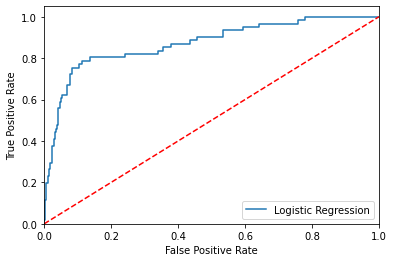

In [335]:
# Calculate the Area Under the Curve (AUC) score for the logistic regression model's predictions
auc = roc_auc_score(y_test, model.predict(X_test))
# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Plot the ROC curve for the logistic regression model
plt.plot(fpr, tpr, label='Logistic Regression' % auc)
# Plot the diagonal line representing a random classifier for comparison
plt.plot([0, 1], [0, 1],'r--')
# Set the x-axis limit to range from 0 to 1
plt.xlim([0.0, 1.0])
# Set the y-axis limit to range from 0 to 1.05 
plt.ylim([0.0, 1.05])
# Label the x-axis as 'False Positive Rate'
plt.xlabel('False Positive Rate')
# Label the y-axis as 'True Positive Rate'
plt.ylabel('True Positive Rate')
# Add a legend to the plot at the lower right corner
plt.legend(loc="lower right")


# Insigts
ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model slightly  approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether the customer will churn or not .

# Decision Trees
First we are going to get the default model performance and then we are going to tune it using the following parameters:

- max_depth
- min_samples_leaf

In [336]:
# Initialize a decision tree classifier with default parameters
dt = DecisionTreeClassifier()
#Train the classifier on the training dataset
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [337]:
#Predict the class labels for the test dataset
y_pred = dt.predict(X_test)
# Calculate the accuracy of the model on the test data
acc=accuracy_score(y_test,y_pred)
print(f'accuracy_score:{round(acc,4)}')
# Predict the probabilities for each class in the test dataset
# predict_proba returns an array of probabilities for each class; [:, 1] selects probabilities for class 1
y_pred = dt.predict_proba(X_test)[:,1]
# Calculate the Area Under the ROC Curve (AUC-ROC)
# This evaluates the model's ability to distinguish between classes
auc=roc_auc_score(y_test, y_pred)
print(f'auc score:{round(auc,4)}')

accuracy_score:0.9268
auc score:0.8366


# Now lets tune the model


In [338]:
# Define a list of depths to test for the Decision Tree
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]
for d in depths:
    # Initialize a Decision Tree Classifier with the current depth
    dt = DecisionTreeClassifier(max_depth=d)
    # Fit the Decision Tree model to the training data
    dt.fit(X_train, y_train)
    # Predict the probabilities for the test data
    y_pred = dt.predict_proba(X_test)[:,1]
     # Calculate the AUC-ROC score for the model at the current depth
    score = roc_auc_score(y_test, y_pred)
    print(d, round(score, 5))

2 0.82913
3 0.88566
4 0.87194
5 0.84461
6 0.85839
7 0.82874
8 0.86345
9 0.86098
10 0.84305
15 0.82233
20 0.82823
50 0.8612


From this we can see that max_depths of 3, 4 and 5 give the best results. From that point we can tune the next parameter min_samples_leaf

In [339]:
# Define a list of possible depths for the Decision Tree
depths = [3, 4, 5]

# Define a list of possible minimum samples per leaf for the Decision Tree
sample_leafs = [1, 2, 5, 10, 15, 20, 100, 200, 500]

# Initialize an empty list to store the scores for different configurations
scores = []

# Loop through each combination of tree depth and minimum samples per leaf
for d in depths:
    for s in sample_leafs:
        # Create a Decision Tree classifier with the current depth and minimum samples per leaf
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        
        # Fit the model on the training data
        dt.fit(X_train, y_train)
        
        # Predict the probability of the positive class for the test data
        y_pred = dt.predict_proba(X_test)[:, 1]
        
        # Calculate the ROC AUC score for the current model
        score = roc_auc_score(y_test, y_pred)
        
        # Append the configuration (depth, min_samples_leaf, and score) to the scores list
        scores.append((d, s, score))

<AxesSubplot:xlabel='depth', ylabel='leafs'>

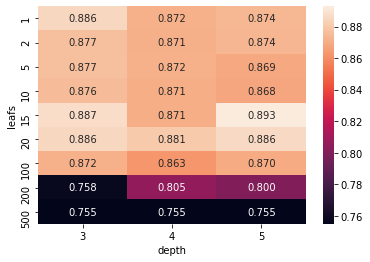

In [340]:
# Create a DataFrame from the list of scores, with columns for depth, number of leaf nodes, and ROC AUC score
df_scores = pd.DataFrame(scores, columns=['depth', 'leafs', 'score'])
sns.heatmap(df_scores.pivot(index='leafs', columns='depth', values='score'), annot=True, fmt='.3f')

## Random Forest
As we did with the Decision Tree model, we are going to try the Random Forest model with default parameters and tune it using:

- n_estimators
- max_depth
- min_sample_leaf

In [341]:
# Create a RandomForestClassifier model with specified parameters
rf = RandomForestClassifier(n_estimators=10, random_state=1)
# Fit the model on the training data (X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [342]:
# Make predictions on the test set using the trained RandomForestClassifier model
y_pred = rf.predict(X_test)
# Calculate and return the accuracy score of the model on the test set
accuracy_score(y_test, y_pred)

0.9625